<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/multiclass_classification-one.vs.all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io

In [3]:
data= scipy.io.loadmat('/content/drive/MyDrive/data/ex3data1.mat')

# New Section

In [4]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


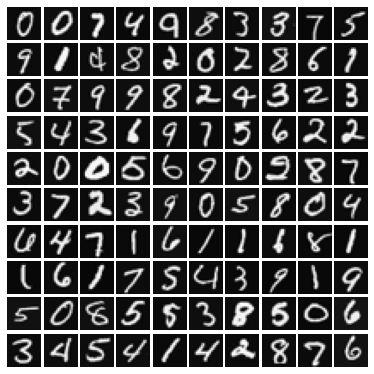

In [5]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
indexes = np.random.choice(5000, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(data['X'][indexes[count]].reshape(20,20).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

In [6]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [7]:
def lr_cost_function(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

In [8]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.hstack((np.ones((5,1)), (np.arange(1,16).reshape(3,5)).T / 10))
y_t = np.array([1, 0, 1, 0, 1]).reshape(5, -1)
lambda_t = 3

In [9]:
J, grad = lr_cost_function(theta_t, X_t, y_t, lambda_t)
print('Cost:', J)
print('Expected cost: 2.534819')
print('Gradients:')
print(grad.T)
print('Expected gradients:')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003')

Cost: [[2.5348194]]
Expected cost: 2.534819
Gradients:
[[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [10]:
import scipy.optimize as opt
def one_vs_all(X, y, num_labels, lambda_reg):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n+1))    
    X = np.hstack((np.ones((m,1)), X))
    
    for i in range(num_labels):
        initial_theta = np.zeros(shape=(n+1))
        opt_results = opt.minimize(lr_cost_function, initial_theta, args=(X, y==i+1, lambda_reg), 
                                   method='TNC', jac=True, options={'maxiter':50})
        all_theta[i, :] = opt_results['x']
        
    return all_theta

In [11]:
def predict_one_vs_all(all_theta, X):
    m, n = X.shape
    X = np.hstack((np.ones((m,1)),X))
    
    pred = sigmoid(X.dot(all_theta.T))
    y_pred = np.argmax(pred, axis=1)+1
    return y_pred

In [13]:
lambda_r = 0.1
num_labels = 10
all_theta = one_vs_all(data['X'], data['y'], num_labels, lambda_r)

In [14]:
y_pred = predict_one_vs_all(all_theta, data['X'])
accuracy = np.mean(y_pred == data['y'].T)
f'Train accuracy: {accuracy * 100}'

'Train accuracy: 94.84'